# Cluster visualization using Self organizing maps(SOMs).

**Data set : Iris data set**

**Implement the SOM using *U matrix* approach.**

***importing the necessary modules:***

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iris-dataset/iris.txt


**Import the data file**

In [2]:
data_file = r'/kaggle/input/iris-dataset/iris.txt'
data_x = np.loadtxt(data_file, delimiter=",", usecols=range(0,4),dtype=np.float64)
data_y = np.loadtxt(data_file, delimiter=",", usecols=[4],dtype=np.int)


**View Dataset**

In [3]:
df = pd.read_csv(data_file)
print(df)

     5.1  3.5  1.4  0.2  1
0    4.9  3.0  1.4  0.2  1
1    4.6  3.1  1.5  0.2  1
2    5.0  3.6  1.4  0.2  1
3    4.6  3.4  1.4  0.3  1
4    5.0  3.4  1.5  0.2  1
..   ...  ...  ...  ... ..
144  6.4  3.1  5.5  1.8  3
145  6.7  3.1  5.6  2.4  3
146  6.8  3.2  5.9  2.3  3
147  6.3  2.5  5.0  1.9  3
148  5.9  3.0  5.1  1.8  3

[149 rows x 5 columns]


In [4]:
df = df.iloc[:,:-1]
df.dtypes

5.1    float64
3.5    float64
1.4    float64
0.2    float64
dtype: object

In [5]:
raws,cols = df.shape
print("Data set raw count=%d column count=%d" %(raws, cols))

Data set raw count=149 column count=4


**Set parameters for SOM**

In [6]:
Dim = 4
Rows = 30; Cols = 30
RangeMax = Rows + Cols
LearnMax = 0.5
StepsMax = 5000
np.random.seed(1)

**Supportive functions needed to decay learning rate, radius and calculate Euclidian distance**

In [7]:
def find_closest_node(data, t, map, m_rows, m_cols):
      result = (0,0)
      small_dist = 1.0e20
      for i in range(m_rows):
        for j in range(m_cols):
          ed = calculate_euc_dist(map[i][j], data[t])
          if ed < small_dist:
            small_dist = ed
            result = (i, j)
      return result

def calculate_euc_dist(v1, v2):
  return np.linalg.norm(v1 - v2) 

def calculate_manhattan_dist(r1, c1, r2, c2):
  return np.abs(r1-r2) + np.abs(c1-c2)

def most_common(lst, n):
  # lst is a list of values 0 . . n
  if len(lst) == 0: return -1
  counts = np.zeros(shape=n, dtype=np.int)
  for i in range(len(lst)):
    counts[lst[i]] += 1
  return np.argmax(counts)

**Construct the SOM**

In [8]:
print("Constructing a 30x30 SOM from the iris data")
map = np.random.random_sample(size=(Rows,Cols,Dim))
for s in range(StepsMax):
    if s % (StepsMax/10) == 0: print("Constructing a SOM step = ", str(s))
    pct_left = 1.0 - ((s * 1.0) / StepsMax)
    curr_range = (int)(pct_left * RangeMax)
    curr_rate = pct_left * LearnMax

    t = np.random.randint(len(data_x))
    (bmu_row, bmu_col) = find_closest_node(data_x, t, map, Rows, Cols)
    for i in range(Rows):
        for j in range(Cols):
            if calculate_manhattan_dist(bmu_row, bmu_col, i, j) < curr_range:
                map[i][j] = map[i][j] + curr_rate * \
(data_x[t] - map[i][j])
print("SOM construction completed \n")

Constructing a 30x30 SOM from the iris data
Constructing a SOM step =  0
Constructing a SOM step =  500
Constructing a SOM step =  1000
Constructing a SOM step =  1500
Constructing a SOM step =  2000
Constructing a SOM step =  2500
Constructing a SOM step =  3000
Constructing a SOM step =  3500
Constructing a SOM step =  4000
Constructing a SOM step =  4500
SOM construction completed 



**Construct and display U-Matrix**

In [21]:
  print("Constructing U-Matrix from SOM")
  u_matrix = np.zeros(shape=(Rows,Cols), dtype=np.float64)
  for i in range(Rows):
    for j in range(Cols):
      v = map[i][j]  # a vector 
      sum_dists = 0.0; ct = 0
     
      if i-1 >= 0:    # above
        sum_dists += calculate_euc_dist(v, map[i-1][j]); ct += 1
      if i+1 <= Rows-1:   # below
        sum_dists += calculate_euc_dist(v, map[i+1][j]); ct += 1
      if j-1 >= 0:   # left
        sum_dists += calculate_euc_dist(v, map[i][j-1]); ct += 1
      if j+1 <= Cols-1:   # right
        sum_dists += calculate_euc_dist(v, map[i][j+1]); ct += 1
      
      u_matrix[i][j] = sum_dists / ct
  print("U-Matrix constructed \n")

Constructing U-Matrix from SOM
U-Matrix constructed 



**Display U-Matrix**

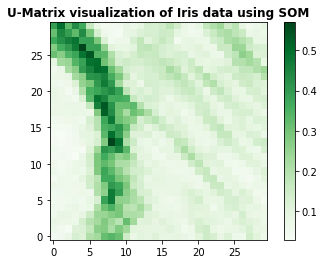

In [17]:
c =plt.imshow(u_matrix, cmap='Greens',interpolation ='nearest', origin ='lower')
plt.colorbar(c)
plt.title('U-Matrix visualization of Iris data using SOM',fontweight ="bold")
plt.show()